# Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization

## Processing Speeches with SpaCy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [2]:
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [3]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [4]:
# subset the speech dataframe for speeches from 2000 and onwards
sou_2000 = sou[sou['Year'] >= 2000].reset_index(drop=True)

In [5]:
speech_docs = []

for text in tqdm(sou_2000['Text']):
    doc = nlp(text)
    speech_docs.append(doc)

100%|██████████| 25/25 [00:27<00:00,  1.09s/it]


## Analyze Tokens vs Lemmas

### Token List

In [6]:
all_tokens = []

for doc in speech_docs:
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            all_tokens.append(token.text.lower())

In [7]:
# print top 20 tokens
# Hint - use Counter, and one of the Counter object's methods to display the top 20
print(Counter(all_tokens).most_common(25))

[('america', 816), ('people', 637), ('american', 582), ('new', 530), ('years', 439), ('americans', 437), ('world', 425), ('year', 406), ('country', 369), ('jobs', 348), ('tonight', 344), ('work', 324), ('know', 323), ('let', 320), ('congress', 317), ('nation', 311), ('time', 301), ('help', 282), ('need', 266), ('tax', 255), ('president', 247), ('economy', 243), ('like', 241), ('right', 240), ('want', 237)]


This list shows the raw most frequent non-stopword tokens in speeches since 2000. Because it uses tokens but not lemmas, different word forms appear separately (e.g., “america,” “american,” “americans”). The results highlight the persistent rhetorical focus on national identity and policy topics. These patterns reflect the modern SOTU’s emphasis on economic performance, national unity, and direct address to listeners.

### Lemma List

In [8]:
all_lemmas = []

for doc in speech_docs:
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            all_lemmas.append(token.lemma_.lower())

print(Counter(all_lemmas).most_common(25))

[('year', 845), ('america', 816), ('people', 639), ('american', 587), ('work', 557), ('new', 532), ('job', 486), ('country', 435), ('americans', 432), ('world', 426), ('know', 395), ('nation', 388), ('help', 378), ('need', 353), ('time', 351), ('tonight', 344), ('child', 332), ('let', 326), ('congress', 317), ('come', 301), ('family', 296), ('good', 294), ('right', 282), ('million', 274), ('want', 264)]


Once tokens are normalized into lemmas, the underlying themes become even clearer. Words that previously appeared separately collapse into a single concept, revealing more accurate frequencies. Rhetorical pillars such as “year,” “america,” and “people” remain dominant, but additional high-frequency lemmas like “child,” “family,” and “million” suggest emphasis on social policy and economic magnitude. Lemmatization makes it easier to see that recurring themes revolve around time, national identity, labor, economy, needs, and collective responsibility.

## Common Words

In [9]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df
    speeches = df[df['Year'] == int(year)]['Text']
    combined_text = " ".join(speeches.astype(str))
    # Step 2: Process the text with spaCy
    doc = nlp(combined_text)
    # Step 3: Get lemmas
    lemmas = [
        token.lemma_.lower() 
        for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    return Counter(lemmas).most_common(n)

In [10]:
# test it on 2024
get_most_common_words(sou, 2024)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29),
 ('pay', 29),
 ('come', 26),
 ('home', 25),
 ('family', 24),
 ('future', 23),
 ('million', 23),
 ('like', 21),
 ('build', 21),
 ('laughter', 20),
 ('americans', 20),
 ('history', 19),
 ('world', 19),
 ('right', 19),
 ('tax', 19),
 ('house', 18)]

This list shows what the latest SOTU (2024) emphasized. Words like “president,” “year,” “america,” and “people” show expected rhetorical framing. The presence of “$,” “member,” “pay,” “tax,” and “future” reflect a strong economic and legislative orientation, while terms like “family,” “home,” “laughter,” and “audience” highlight the blend of emotional appeal and conversational tone typical of recent Biden speeches. Overall, the 2024 speech appears highly focused on economic issues, affordability, and social well-being.

### Compare 2023 to 2017

In [11]:
words_2023 = get_most_common_words(sou, 2023, 20)
words_2017 = get_most_common_words(sou, 2017, 20)

In [12]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [13]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [14]:
# Hint - put the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=['Word', 'Count'])
df_2023 = pd.DataFrame(words_2023, columns=['Word', 'Count'])

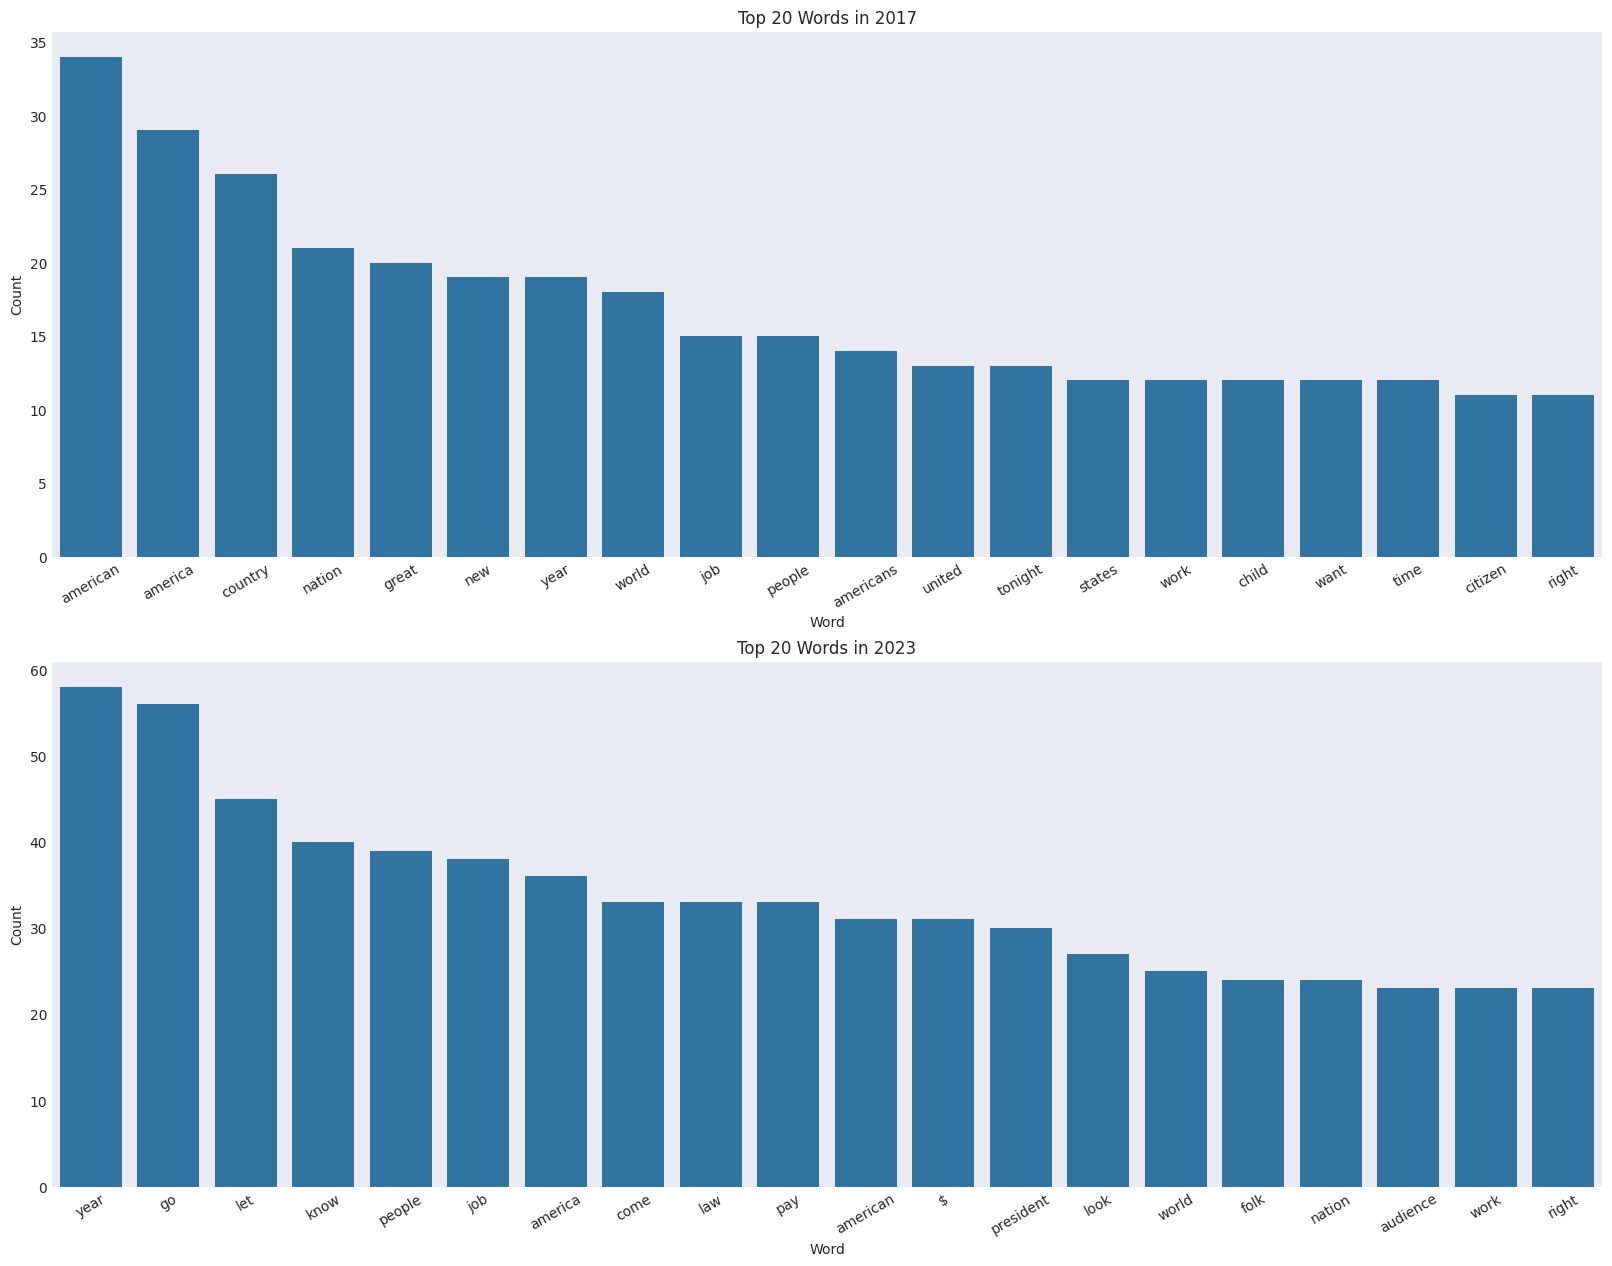

In [16]:
# Hint - use seaborn, subplots, and rotate tick labels
fig, axes = plt.subplots(2, 1, figsize=(20, 15))

# 2017 Plot
sns.barplot(data=df_2017, x='Word', y='Count', ax=axes[0])
axes[0].set_title('Top 20 Words in 2017')

# 2023 Plot
sns.barplot(data=df_2023, x='Word', y='Count', ax=axes[1])
axes[1].set_title('Top 20 Words in 2023')

axes[0].tick_params("x", labelrotation=30)
axes[1].tick_params("x", labelrotation=30)
plt.savefig("outputs/p2_top_words_2017_2023.png")
plt.show()

The contrast between 2017 and 2023 shows how presidential rhetoric shifts with political priorities, governing style of the two presidents, and the broader moment in which the speeches occur. The 2017 speech (Trump) emphasize national identity, greatness, and collective unity. The vocabulary reflects campaign-style rhetoric focused on restoration, antionalism, and patriotism. By contrast, the 2023 speech (Biden) places more emphasis on action-oriented verbs, policy and legal language, and economic issues. There is also more informl language, fidtting Biden's conversational tone. Taken together, the linguistic differences reflect not just two presidents’ personalities, but two distinct governing contexts: one centered on broad national repositioning, the other on day-to-day policy action and practical concerns.

## TF-IDF Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

### Train the Vectorizer and Transform the Data

In [18]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [19]:
# Hint - use fit_transform for vectorizer and PCA
vectorizer = TfidfVectorizer()
vectorized_docs = vectorizer.fit_transform(raw_docs)


### Plot Speeches

- First used PCA to generate the first chart
- Second use seaborn heatmap with a log-scaled color axis to generate the second chart

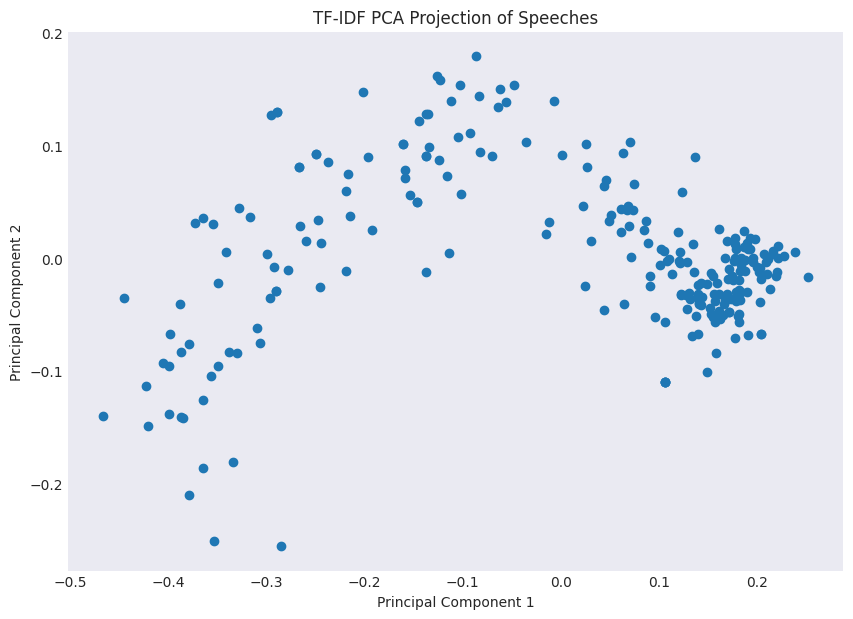

In [21]:
# Step 1: Set PCA to find first 2 principal components
pca = PCA(n_components=2)
coords = pca.fit_transform(vectorized_docs.toarray())
# Step 2: Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
pca_df = pd.DataFrame(coords, columns=["PC1", "PC2"])
pca_df["President"] = sou["President"].values
# Plot Data Visualization (Matplotlib)
plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("TF-IDF PCA Projection of Speeches")
plt.savefig("outputs/p2_speeches_projection.png")
plt.show()

The PCA projection compresses each entire speech into two principal components based on TF-IDF scores. The resulting scatterplot shows a visible clustering pattern, where many points form a dense grouping on the right side while others are more spread out. This indicates that many speeches share similar high-level vocabulary profiles (likely modern SOTUs), while older or stylistically unusual speeches diverge noticeably.

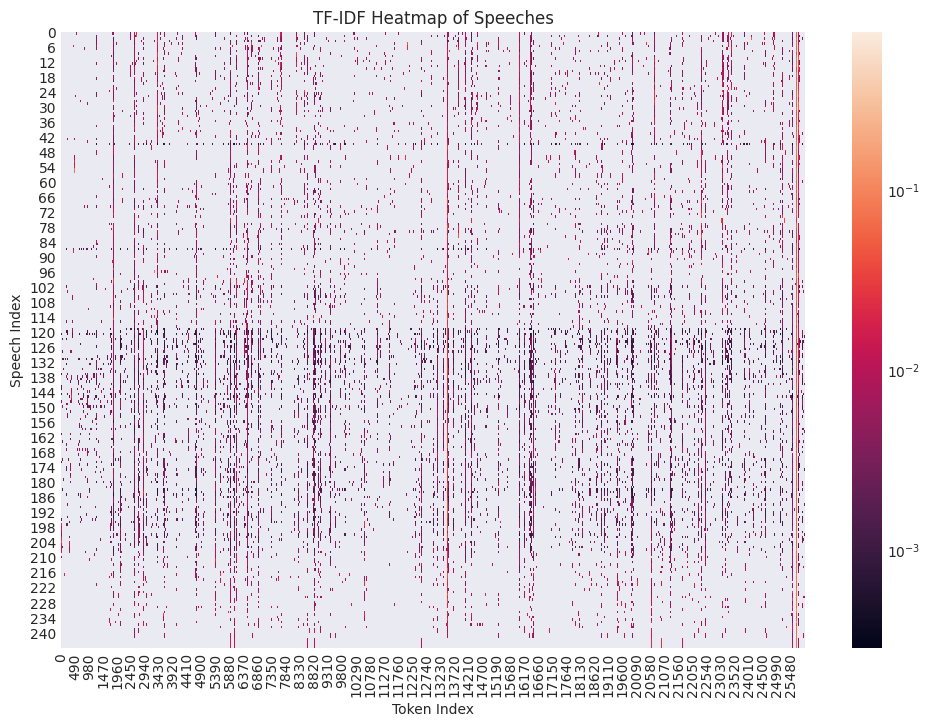

In [22]:
# Hint - vectorized_docs is a sparse matrix whose rows are speeches and columns are tokens, with each
# value being a TF-IDF score. Densify this array first, and then plot using seaborn.
from matplotlib.colors import LogNorm

vectorized_docs = vectorizer.fit_transform(raw_docs)
dense_matrix = vectorized_docs.todense()

plt.figure(figsize=(12, 8))
sns.heatmap(dense_matrix, norm=LogNorm())
plt.title("TF-IDF Heatmap of Speeches")
plt.xlabel("Token Index")
plt.ylabel("Speech Index")
plt.savefig("outputs/p2_speeches_heatmap.png")
plt.show()

This heatmap visualizes TF-IDF values for every token across all speeches. The log scale makes rare, high-impact words more visible. The scattered dark streaks indicate tokens that are highly characteristic of particular speeches, either because they refer to unique events (e.g. specific wars) or reflect unique rhetorical styles of specific periods. The vertical dispersion shows that many tokens are rarely used across the corpus, highlighting how SOTU speeches introduce specialized or context-specific vocabulary depending on the year. Meanwhile, consistently lighter zones indicate shared common vocabulary across all presidents.

### Get the TF-IDF value for certain words and documents

In [23]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [24]:
word_nums = [vectorizer.vocabulary_[word] for word in word_list]  # get each word's index number using the .vocabular_ attributed of vectorizer

In [25]:
idf_score = [vectorizer.idf_[i] for i in word_nums] # get their IDF score by using .idf_ at the indices from the previous step

In [26]:
tf_idf = [vectorized_docs[0, i] for i in word_nums] # get the tf_idf score for the first speech

In [27]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
